In [2]:
!pip install netCDF4
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 4.7MB 19.5MB/s 
     |████████████████████████████████| 317kB 51.8MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
     | 150.4MB 2.3MB/s
     |████████████████████████████████| 6.5MB 14.8MB/s 
     |████████████████████████████████| 225kB 59.9MB/s 
     |████████████████████████████████| 2.8MB 18.6MB/s 


In [1]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [4]:
etopodata = Dataset('etopo5.cdf')

In [5]:
etopodata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note: updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993
    dimensions(sizes): ETOPO05_X(4320), ETOPO05_Y(2161)
    variables(dimensions): float64 ETOPO05_X(ETOPO05_X), float64 ETOPO05_Y(ETOPO05_Y), float32 ROSE(ETOPO05_Y, ETOPO05_X)
    groups: 

In [6]:
etopodata.variables.keys()

dict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])

Text(0.5, 1.0, 'ETOPO5 Topography - Lambert Conformal Conic')

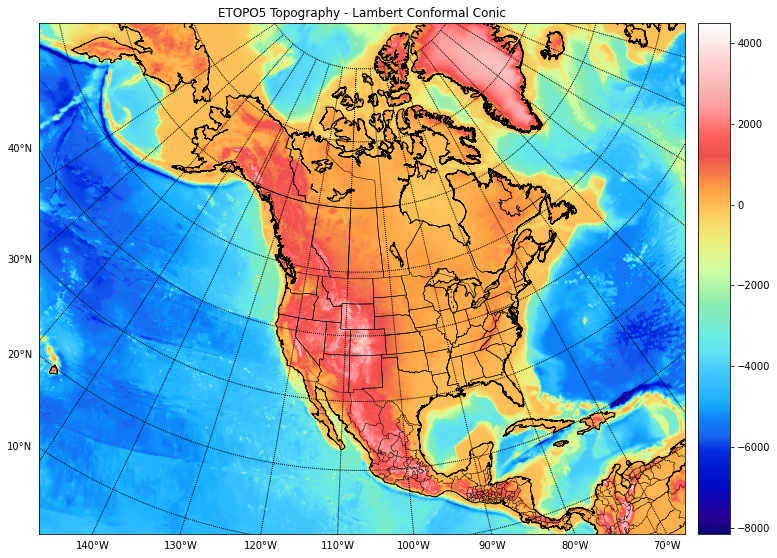

In [7]:
topoin=etopodata.variables['ROSE'][:]
lons=etopodata.variables['ETOPO05_X'][:]
lats=etopodata.variables['ETOPO05_Y'][:]
topoin,lons=shiftgrid(180.,topoin,lons,start=False)
# 繪製地形/降水量
# 創建圖形和軸實例
fig=plt.figure(figsize=(12,12))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='f',area_thresh=10000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
im = m.imshow(topodat,cm.GMT_haxby)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
parallels=np.arange(0,90,10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians=np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
# 加入 colorbar
cb=m.colorbar(im,'right',size='5%',pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')

warp to orthographic map ...


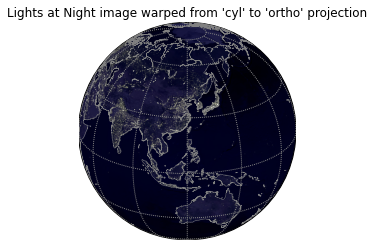

In [4]:
from __future__ import (absolute_import, division, print_function)
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt


# 說明使用warpimage method 方法顯示圖像背景。
# 在地圖投影區域。 預設背景是『藍色。
#來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

# 建立新圖像
fig=plt.figure()
# 定義以台灣為中心的正交投影.
m = Basemap(projection='ortho',lat_0=23,lon_0=120,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

plot native cylindrical map (no warping needed) ...


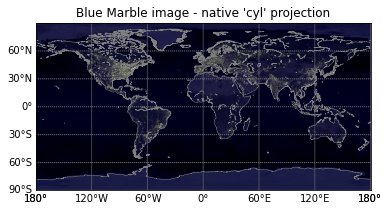

In [22]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
fig=plt.figure()
#新定義圓柱形等距投影。
m = Basemap(projection='cyl',lat_0=23,lon_0=120,llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5')
# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()

cat: /var/log/colab-jupyter.log: No such file or directory
